In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys
import matplotlib as mpl
from scipy.interpolate import griddata 
import warnings
import os
import numpy as np
sys.path.append('C:/Users/shjo/Bridge/JNUpack/SO/libs/')
warnings.filterwarnings('ignore')
from myTools import myInfo
from myTrend import myfitting2d_sttcs,myRegress3d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib as mpl
# mpl.use('agg')

In [2]:
### ======================================================================
pthMO='J:/tmp_proc/Models/'
pthrn='J:/tmp_proc/Obs/'

mySig_npth='C:/Users/shjo/OneDrive/mySO/mySignals/mySAM.pkl'

wpth='C:/Users/shjo/OneDrive/mySO/Regression_H/Var500/'

varnm='temp'
t_rng=['1993-01', '2017-12']
lat_rng=[-75,-30]; lon_rng=[0,360]

In [3]:
### load Index ==================================================================
with open(mySig_npth, 'rb') as f:
    data = pickle.load(f)f ㅏ.호 ㅏㅓㅗㅓㅎㄹㅇㅋ
mySAM=data.loc['1993-01':'2017-12']
mySAM=mySAM.rolling(window=12,center=True).mean()[6:-5]
# print(mySAM)

In [4]:
### Preparation ============================================================
wpth=wpth+varnm+'_'+str(t_rng[0][:4])+'_'+str(t_rng[-1][:4])+'_'+\
    str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'+'_'+\
        'E'+str(lon_rng[-1])+'E/'
wpth=wpth.replace('-','')
try :
    os.mkdir(wpth)
    loc=sys._getframe().f_code.co_filename
    myInfo(loc,wpth)
except:
    pass

myRnly=[pthrn+i for i in os.listdir(pthrn) if i.endswith('.nc')]
myMDOB=[pthMO+i for i in os.listdir(pthMO) if i.endswith('.nc')]
myDATA=myMDOB+myRnly
if int(t_rng[0].split('-')[0])<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myISA')]

!!! Open: J:/tmp_proc/Obs/myEN4_195501_202212_tsh.nc !!!
!!! linregress !!!
EN4_temp500m_regression_SAM_75S30S_0E360E_1993_2017


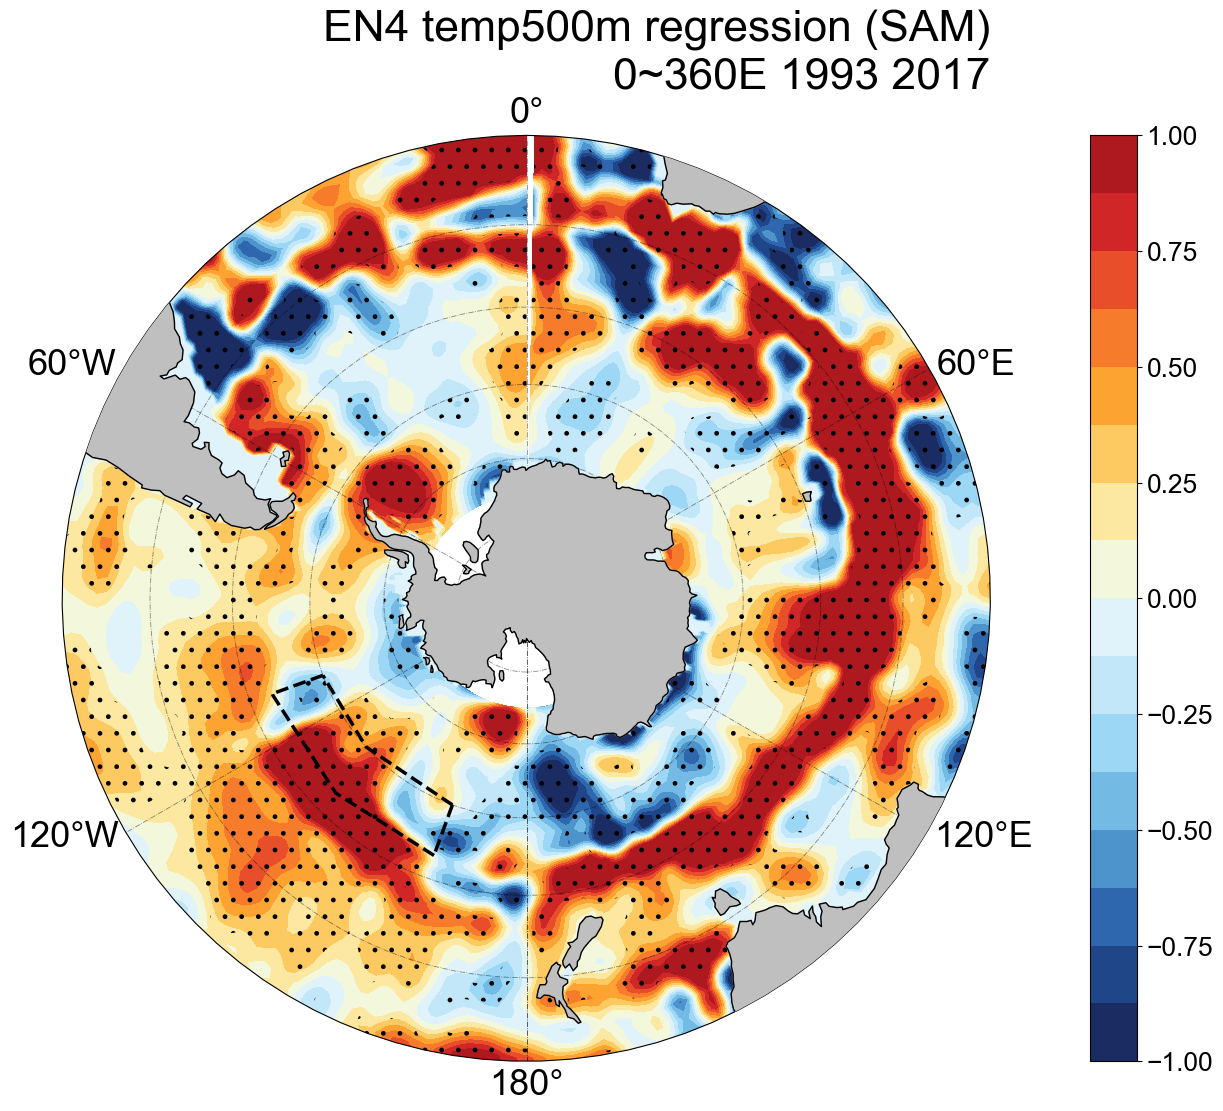

In [16]:
### Read Data ==============================================================
for i in myDATA: 
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)
    if len(tmp.coords)==4:
        mydata = tmp[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
            ,time=slice(t_rng[0],t_rng[-1]),depth=slice(450,550))].mean(dim='depth')
    
    mydata=mydata.where(mydata<1000)
    mydata=mydata.where(mydata>-1000)
    
    mydata=mydata.fillna(0)
    mydata=mydata.rolling(time=12,center=True).mean()[6:-5]
    
    lonR,latR=mydata.lon.values,mydata.lat.values
    lonR_m,latR_m=np.meshgrid(lonR,latR)
    time=mydata.time.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+'500m regression (SAM)\n'+\
        str(lon_rng[0])+'~'+str(lon_rng[-1])+'E '+str(time[0])[:4]+' '+str(time[-1])[:4]
    dta_snm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+'500m regression SAM_'+\
        str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'+' '+str(lon_rng[0])+'E'+str(lon_rng[-1])+'E_'+\
            str(time[0])[:4]+' '+str(time[-1])[:4]
    
    dta_snm=dta_snm.replace(' ','_').replace('salt','salinity').replace('-','')
    dta_nm=dta_nm.replace('salt','salinity').replace('-','')
    
    ### SST Coef =============================================================
    print('!!! linregress !!!')
    # plt.figure()
    # plt.scatter(range(300),mydata[:,30,20])
    # plt.show()
    # raise
    slope,intercept,r_value,p_value,std_err,smask=myRegress3d_sttcs(mySAM['SAM'],mydata,threshold=0.05)
    # CoefD=slope*10**10 # Decadal^-1
    CoefD=slope*10 # Decadal^-1
    
    smask[CoefD==0]=np.nan
    ### Figure configs =======================================================
    # myCoefs.append(CoefD); myNm.append(dta_nm); myLat.append(latR)
    # raise
    
    myN=16
    mylim=[-1.,1.]
    CMAP,mylevel=myClrbr('myblc2',mylim,myN)
    CMAP_salt,mylevel_salt=myClrbr('salt',mylim,myN)
    CMAP_temp,mylevel_temp=myClrbr('balance',mylim,myN)

    CoefD[CoefD<mylim[0]]=mylim[0]
    CoefD[CoefD>mylim[-1]]=mylim[-1]
    
    mySetting={
        'figsize': '',
        'mylabel': '',
        'Label_size':18,
        'title_loc':'right',
        'fontParams':'Arial',
        'wpth':wpth}
    
    lat_rng_,lon_rng_=[-60,-53],[200,250]

    F=figmaster(mySetting)
    print(dta_snm)
    F.myCrtpy_sph3_box(latR_m,lonR_m,CoefD,smask,CMAP,mylevel,dta_nm,dta_snm,lat_rng_,lon_rng_)

    